In [1]:
import os
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
  
import food_mnist

from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

module google.colab.patches not imported.


In [2]:
(x_train, y_train), (x_test, y_test) = food_mnist.load_data()
labels_dict = food_mnist.labels()

In [3]:
x_train = x_train/255.
x_test = x_test/255.

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))
print(y_train[500])

number of training examples = 3750
number of test examples = 1250
X_train shape: (3750, 224, 224, 3)
Y_train shape: (3750, 10)
X_test shape: (1250, 224, 224, 3)
Y_test shape: (1250, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, 3, activation ='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, activation ='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(100, activation ='relu'))
model.add(layers.Dense(10, activation ='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
118/118 [==============================] - 76s 646ms/step - loss: 2.5265 - accuracy: 0.1832
Epoch 2/5
118/118 [==============================] - 82s 698ms/step - loss: 1.9148 - accuracy: 0.3312
Epoch 3/5
118/118 [==============================] - 82s 697ms/step - loss: 1.4034 - accuracy: 0.5307
Epoch 4/5
118/118 [==============================] - 82s 697ms/step - loss: 0.6731 - accuracy: 0.7941
Epoch 5/5
118/118 [==============================] - 84s 713ms/step - loss: 0.2060 - accuracy: 0.9437


In [6]:
y_pred = model.predict(x_test)
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range (len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
  
    total += 1

print('Total-test-data:',total,'\nAccurately-predicted-data:',accurate,'\nWrongly-predicted-data:',total - accurate)
print('Accuracy:',round(accurate/total*100,3),'%')

Total-test-data: 1250 
Accurately-predicted-data: 412 
Wrongly-predicted-data: 838
Accuracy: 32.96 %


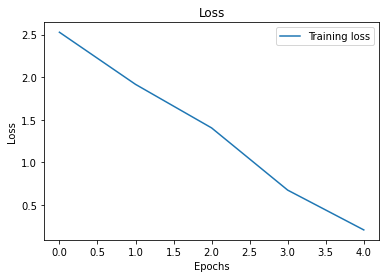

In [8]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = np.arange(0,5)
plt.plot(epochs, loss, label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

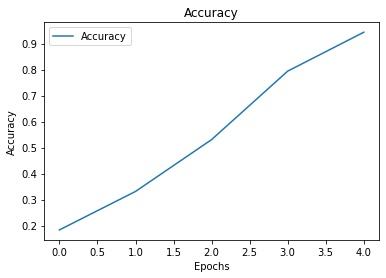

In [9]:
accuracy = history.history['accuracy']
epochs = np.arange(0,5)
plt.plot(epochs, accuracy, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()